In [ ]:
# all are same as IDMB movie rating.
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# its parameters for tokenize aur embedding layer
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
# its important we select only 20000 dataset for trainig rest for testing..
training_size = 20000


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json
    # here dataset is loaded in this notebook and download..


--2020-06-21 08:38:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.07s   

2020-06-21 08:38:49 (76.0 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
# its preprocessing as same as IMDB rating...
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [ ]:
# here spilte the dataset into training or testing.
training_sentences = sentences[0:training_size] # 0 to 20000 senetences assign into training_sentences .
testing_sentences = sentences[training_size:] # here from end of training sentence to end of the list are assign into testing_sentences
training_labels = labels[0:training_size]# its same like above
testing_labels = labels[training_size:] # its same like above

In [ ]:
# text convert into vector using tokenization , its same like IMDB rating .
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
# here apply the sequential model using embedding layer, learn embedding layer go to copy.
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6679 - accuracy: 0.5773 - val_loss: 0.5960 - val_accuracy: 0.7180
Epoch 2/30
625/625 - 2s - loss: 0.4536 - accuracy: 0.8188 - val_loss: 0.3977 - val_accuracy: 0.8369
Epoch 3/30
625/625 - 2s - loss: 0.3236 - accuracy: 0.8727 - val_loss: 0.3604 - val_accuracy: 0.8493
Epoch 4/30
625/625 - 2s - loss: 0.2693 - accuracy: 0.8959 - val_loss: 0.3551 - val_accuracy: 0.8471
Epoch 5/30
625/625 - 2s - loss: 0.2315 - accuracy: 0.9112 - val_loss: 0.3432 - val_accuracy: 0.8559
Epoch 6/30
625/625 - 2s - loss: 0.2035 - accuracy: 0.9230 - val_loss: 0.3492 - val_accuracy: 0.8556
Epoch 7/30
625/625 - 2s - loss: 0.1817 - accuracy: 0.9328 - val_loss: 0.3626 - val_accuracy: 0.8518
Epoch 8/30
625/625 - 2s - loss: 0.1635 - accuracy: 0.9400 - val_loss: 0.3710 - val_accuracy: 0.8541
Epoch 9/30
625/625 - 2s - loss: 0.1471 - accuracy: 0.9453 - val_loss: 0.4006 - val_accuracy: 0.8469
Epoch 10/30
625/625 - 2s - loss: 0.1321 - accuracy: 0.9534 - val_loss: 0.4185 - val_accuracy: 0.8453

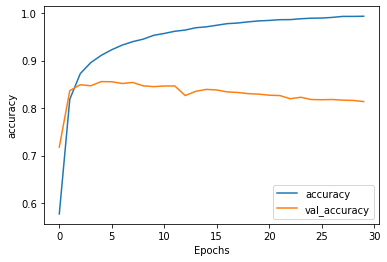

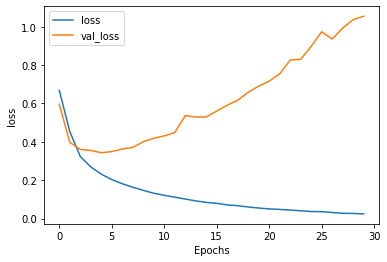

In [ ]:
# here we saw loss function or accuracy function.
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")